# Extra-Pによって出力されたモデルと卒研の4モデルを比較するためのノート

* 問題サイズに対する予測：データ数 4 の平均絶対誤差率よりデータ数 3 の平均絶対誤差率が低い関数
* コア数に対する予測：平均絶対誤差率が0.1%より大きい関数

のプロット・図示を行う。

In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb
InteractiveShell.ast_node_interactivity = 'last_expr'

Text(0.5, 0, '問題サイズ[A=1, B=4, C=16, D=256]')

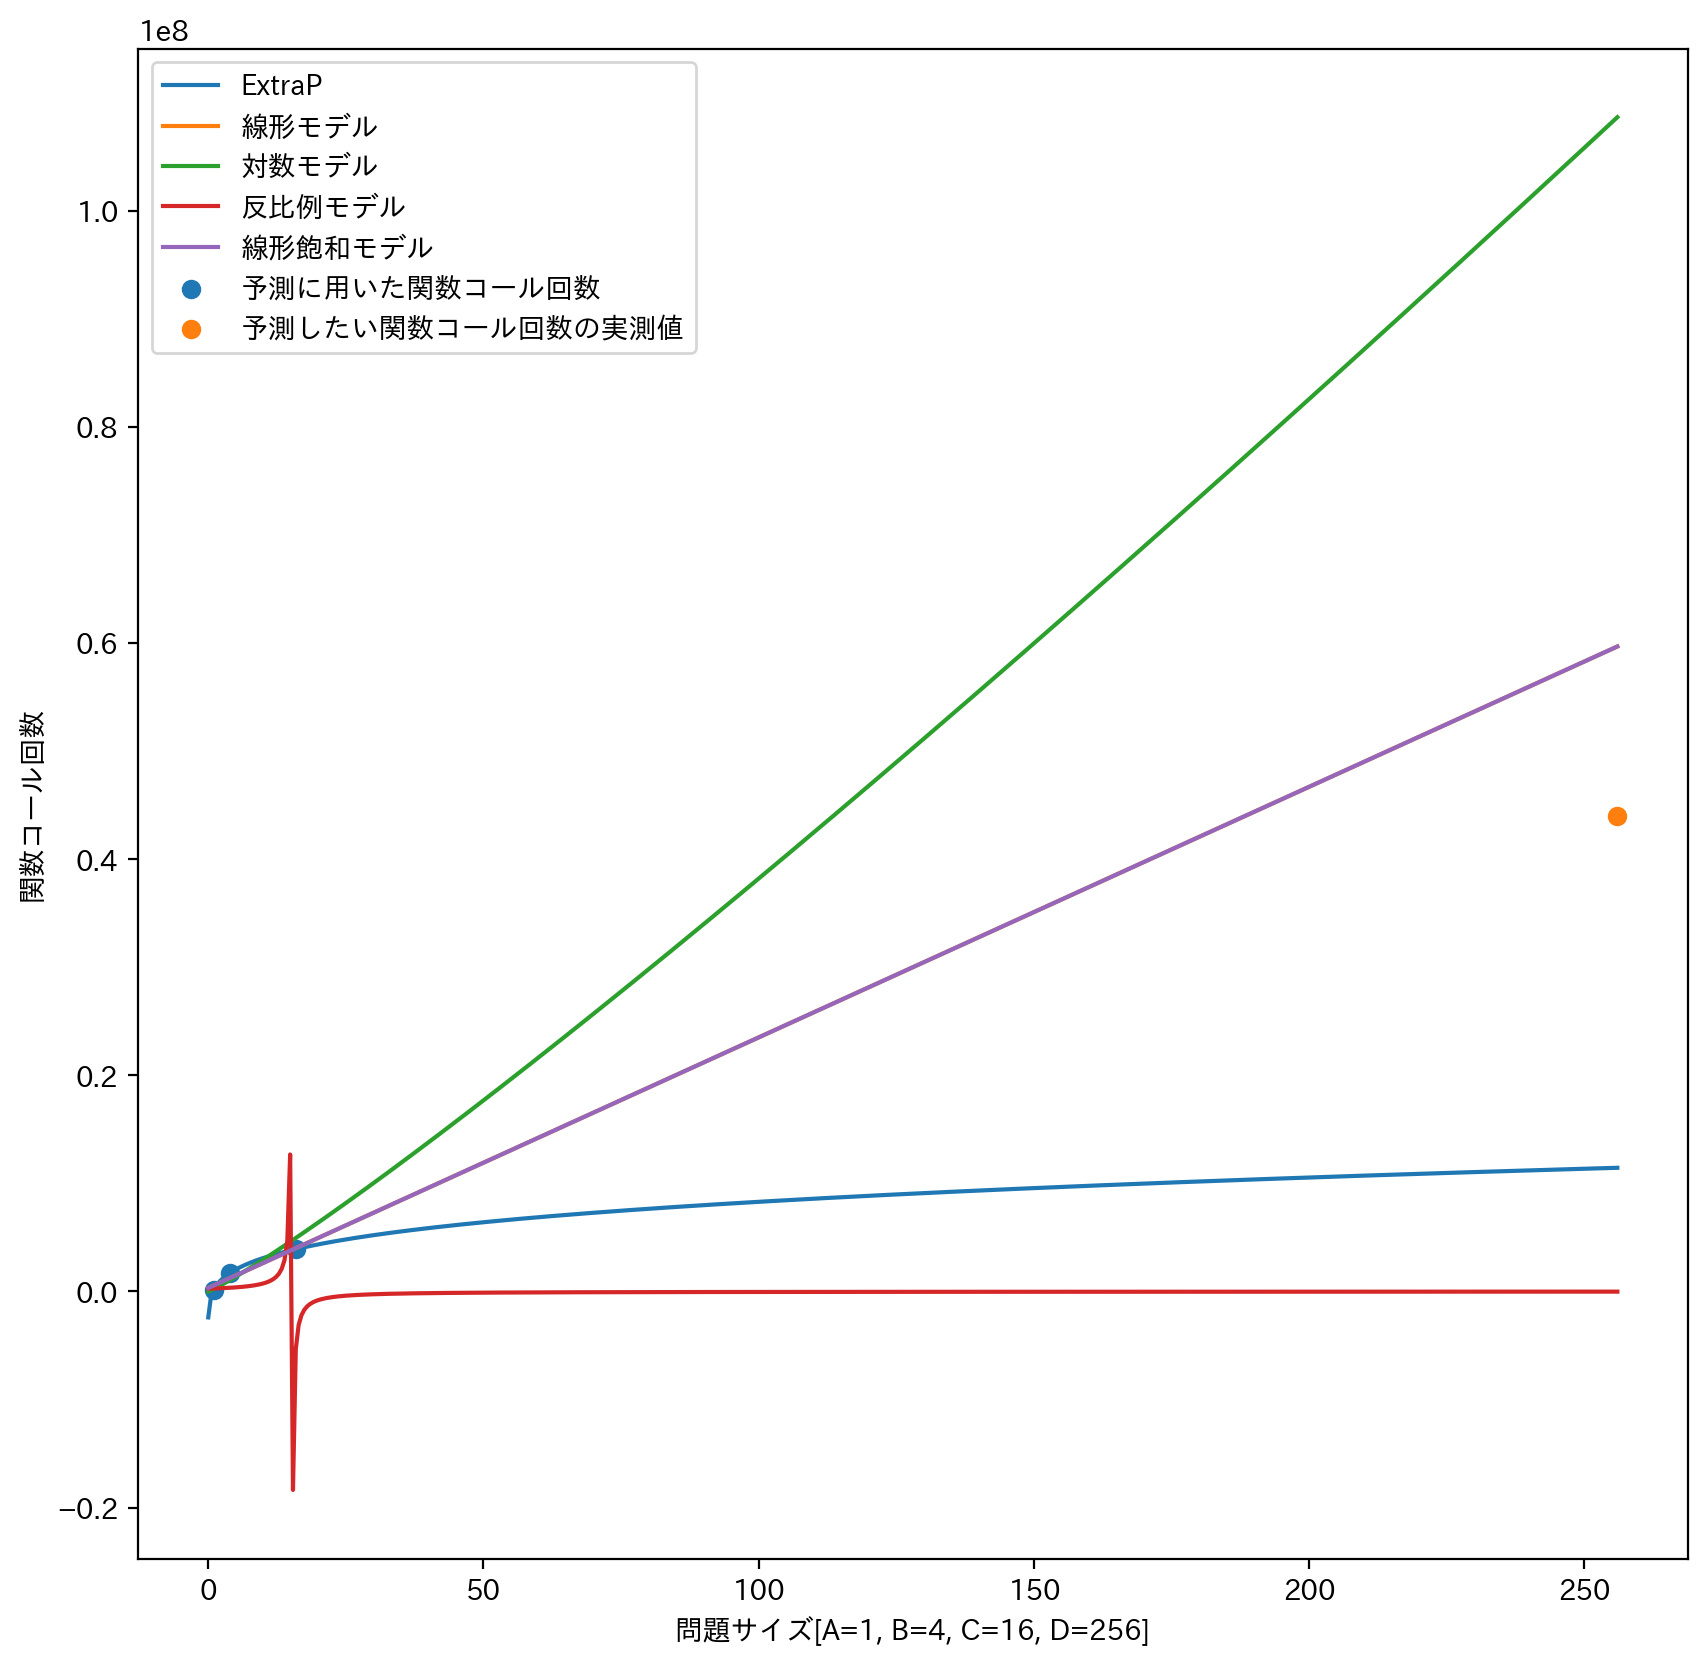

In [2]:
plt.figure(figsize=(10,10),dpi=200)

# Extra-PでfixProcessデータを入力して出力したモデルの図時
plot_x = np.linspace(0.01, 256, 500)
# -3590464.6990329633 + 3759195.349891038 * p^(1/4)
plot_y = []
for x in plot_x:
    plot_y.append(-3590464.6990329633 + 3759195.349891038 * x**(1/4))
plt.plot(plot_x, plot_y, label="ExtraP")

x = [1, 4, 16]
y = [180347, 1706010, 3936140]
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
plt.scatter(x, y, marker="o", label="予測に用いた関数コール回数")
plot_x = np.array(plot_x).reshape(-1, 1)
x_target = [256]
y_target = [44047200]
plt.scatter(x_target, y_target, marker="o", label="予測したい関数コール回数の実測値")

# 線形モデル
model_lin = ModelLin(x, y, "CG", "ICNVRT", test_ratio=0)
model_lin.calc_lr()
plot_y_lin = model_lin.predict(plot_x)
plt.plot(plot_x, plot_y_lin, label="線形モデル")
# logモデル
model_log10 = ModelLog10(x, y, "CG", "ICNVRT", test_ratio=0)
model_log10.calc_lr()
plot_y_log10 = model_log10.predict(plot_x)
plt.plot(plot_x, plot_y_log10, label="対数モデル")
# 反比例モデル
model_ip = ModelIP(x, y, "CG", "ICNVRT", test_ratio=0)
model_ip.calc_lr()
plot_y_ip = model_ip.predict(plot_x)
plt.plot(plot_x, plot_y_ip, label="反比例モデル")
# 線形飽和モデル
model_branch = ModelBranch(x, y, "CG", "ICNVRT", test_ratio=0)
model_branch.calc_lr()
plot_y_branch = model_branch.predict(plot_x)
plt.plot(plot_x, plot_y_branch, label="線形飽和モデル")
# 凡例の表示
plt.legend()
# 軸ラベルの設定
plt.ylabel("関数コール回数")
plt.xlabel("問題サイズ[A=1, B=4, C=16, D=256]")


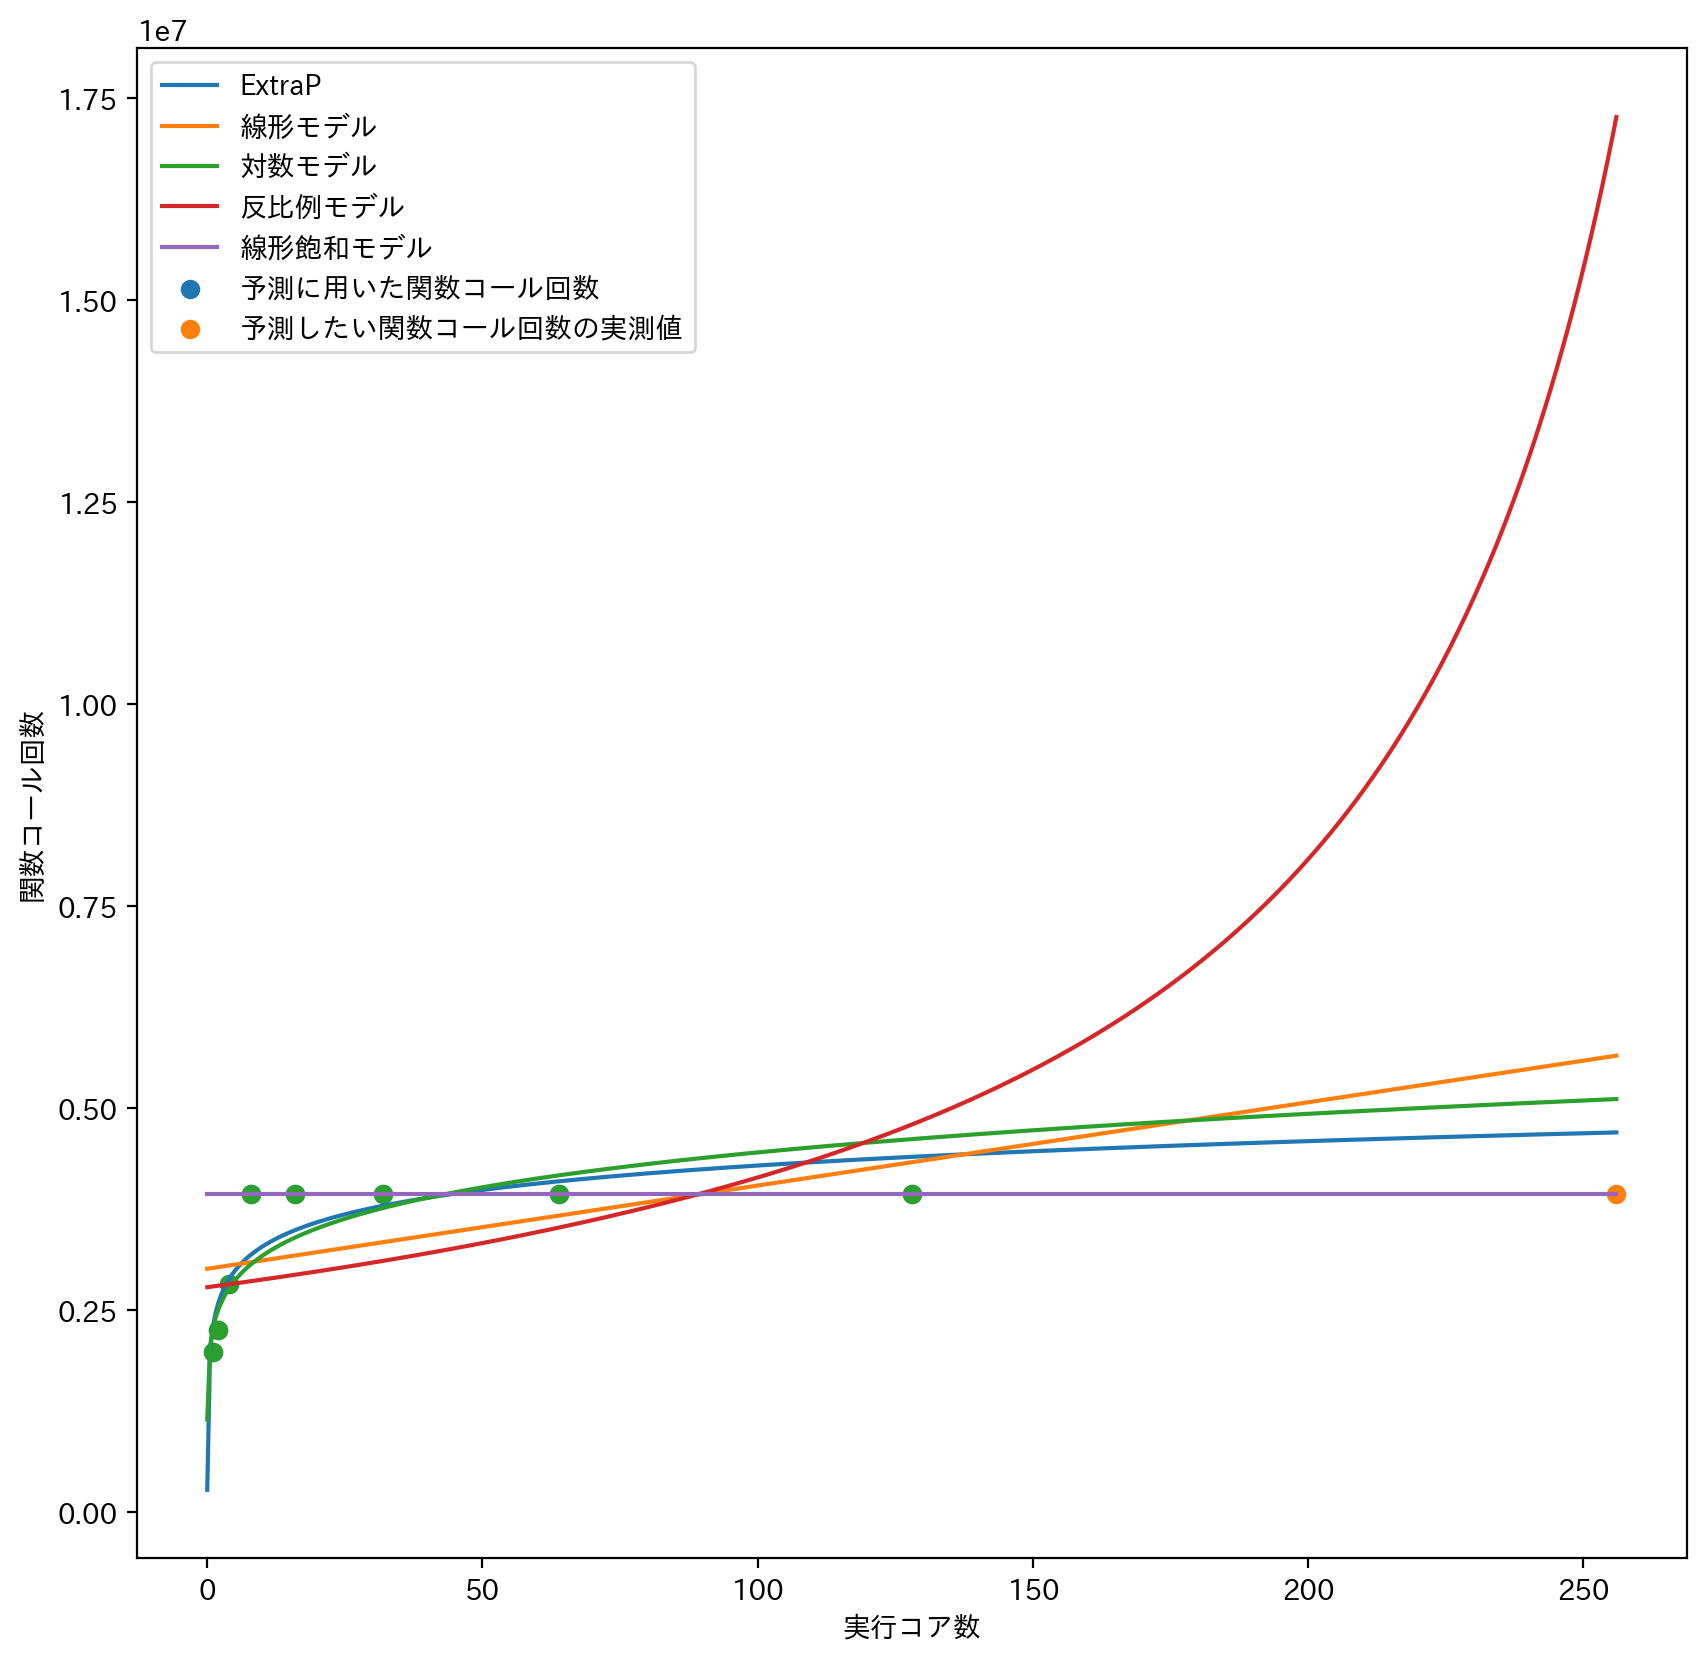

In [3]:
plt.figure(figsize=(10,10),dpi=200)

# Extra-PでfixProcessデータを入力して出力したモデルの図時
plot_x = np.linspace(0.01, 256, 500)
# -3590464.6990329633 + 3759195.349891038 * p^(1/4)
plot_y = []
for x in plot_x:
    plot_y.append(2286768.3333333326 + 301997.61904761934 * math.log2(x)**(1))
plt.plot(plot_x, plot_y, label="ExtraP")

x = [1, 2, 4, 8, 16, 32, 64, 128]
y = [1984770.0, 2263540.0, 2821070.0, 3936140.0, 3936140.0, 3936140.0, 3936140.0, 3936140.0]
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1, 1)
plt.scatter(x, y, marker="o", label="予測に用いた関数コール回数")
plot_x = np.array(plot_x).reshape(-1, 1)
x_target = [256]
y_target = [3936140]
plt.scatter(x_target, y_target, marker="o", label="予測したい関数コール回数の実測値")

# 線形モデル
model_lin = ModelLin(x, y, "CG", "ICNVRT", test_ratio=0)
model_lin.calc_lr()
plot_y_lin = model_lin.predict(plot_x)
plt.plot(plot_x, plot_y_lin, label="線形モデル")
# 対数モデル
model_log10 = ModelLog10(x, y, "CG", "ICNVRT", test_ratio=0)
model_log10.calc_lr()
plot_y_log10 = model_log10.predict(plot_x)
plt.plot(plot_x, plot_y_log10, label="対数モデル")
# 反比例モデル
model_ip = ModelIP(x, y, "CG", "ICNVRT", test_ratio=0)
model_ip.calc_lr()
plot_y_ip = model_ip.predict(plot_x)
plt.plot(plot_x, plot_y_ip, label="反比例モデル")
# 線形飽和モデル
model_branch = ModelBranch(x, y, "CG", "ICNVRT", test_ratio=0)
model_branch.calc_lr()
plot_y_branch = model_branch.predict(plot_x)
plt.plot(plot_x, plot_y_branch, label="線形飽和モデル")
# 凡例の表示
plt.legend()
# 軸ラベルの設定
plt.ylabel("関数コール回数")
plt.xlabel("実行コア数")

plt.scatter(x, y, marker="o")

In [4]:
FixedProcessDict = {}
for benchmark in benchmarks:
    targetDF = return_ErrorRateFixedProcessDF(benchmark=benchmark, FixProcess=64, predict_class="D")
    columns = targetDF.columns.tolist()
    # データ数4の予測精度よりデータ数3の予測精度のほうが高いものを抽出
    targetDF = targetDF[targetDF[columns[0]] > targetDF[columns[1]] ]
    # データが同じことに由来する重複を削除
    targetDF = targetDF[~targetDF.duplicated()]
    targetFunctionNameList = targetDF.index.tolist()
    FixedProcessDict[benchmark] = targetFunctionNameList
FixedProcessDict

funcCallNumDict = {}
for benchmarkName in FixedProcessDict:
    print(f"-----{benchmarkName}-----")
    funcCallNumDict[benchmarkName] = {}
    for functionName in FixedProcessDict[benchmarkName]:
        funcCallNumDict[benchmarkName][functionName] = returnRawDF(Benchmark = benchmarkName, functionName = functionName, fix="Process", benchmarkClass = ["A", "B", "C", "D"], FixedProcess = 64)
        funcCallNumDict[benchmarkName][functionName]
        print(f"_____\"{functionName}\"_____")

-----bt-----
_____"LHSABINIT"_____
_____"MPI_Irecv()"_____
_____"MPI_Wait()"_____
-----cg-----
_____"CONJ_GRAD"_____
_____"MPI_Irecv()"_____
-----ep-----
-----ft-----
_____"CHECKSUM"_____
-----is-----
-----lu-----
_____"EXACT"_____
-----mg-----
_____"GIVE3_EX"_____
-----sp-----
_____"LHSX"_____
_____"MPI_Irecv()"_____
_____"MPI_Waitall()"_____


In [5]:
FixedClassDict = {}
for benchmark in benchmarks:
    targetDF = return_ErrorRateFixedClassDF(benchmark=benchmark, FixClass="B", predict_process=256)
    columns = targetDF.columns.tolist()
    # 平均絶対誤差率が0.1より大きいものを抽出
    targetDF = targetDF[targetDF[columns[0]] > 0.1]
    # データが同じことに由来する重複を削除
    targetDF = targetDF[~targetDF.duplicated()]
    targetFunctionNameList = targetDF.index.tolist()
    FixedClassDict[benchmark] = targetFunctionNameList
FixedClassDict

# Extra-Pへの入力ファイルを生成
funcCallNumDict = {}
for benchmarkName in FixedClassDict:
    print(f"-----{benchmarkName}-----")
    if benchmarkName == "bt" or benchmarkName == "sp" :
        _processes = process_onlyBTSP
    else:
        _processes = process_excludeBTSP
    funcCallNumDict[benchmarkName] = {}
    for functionName in FixedClassDict[benchmarkName]:
        funcCallNumDict[benchmarkName][functionName] = returnRawDF(Benchmark = benchmarkName, functionName = functionName, fix="Class", Processes = _processes, FixedBenchmarkClass="B")
        generateInputFileForExtraP(funcCallNumDict[benchmarkName][functionName], repeated=3, includeLastData = False)
        print(f"_____\"{functionName}\"_____")

-----bt-----
_____"EXACT_SOLUTION"_____
-----cg-----
_____"MPI_Irecv()"_____
-----ep-----
-----ft-----
_____"CFFTZ"_____
_____"FFTZ2"_____
_____"SET_CLASS"_____
-----is-----
_____"MPI_Irecv()"_____
_____"double_randlc(double_*_double_*)"_____
-----lu-----
_____"BLTS"_____
_____"EXCHANGE_6"_____
-----mg-----
_____"BUBBLE"_____
_____"ZERO3"_____
-----sp-----
_____"EXACT_SOLUTION"_____


> * コア数に対する予測：平均絶対誤差率が0.1%より大きい関数

___________________"bt"_____"EXACT_SOLUTION"___________________


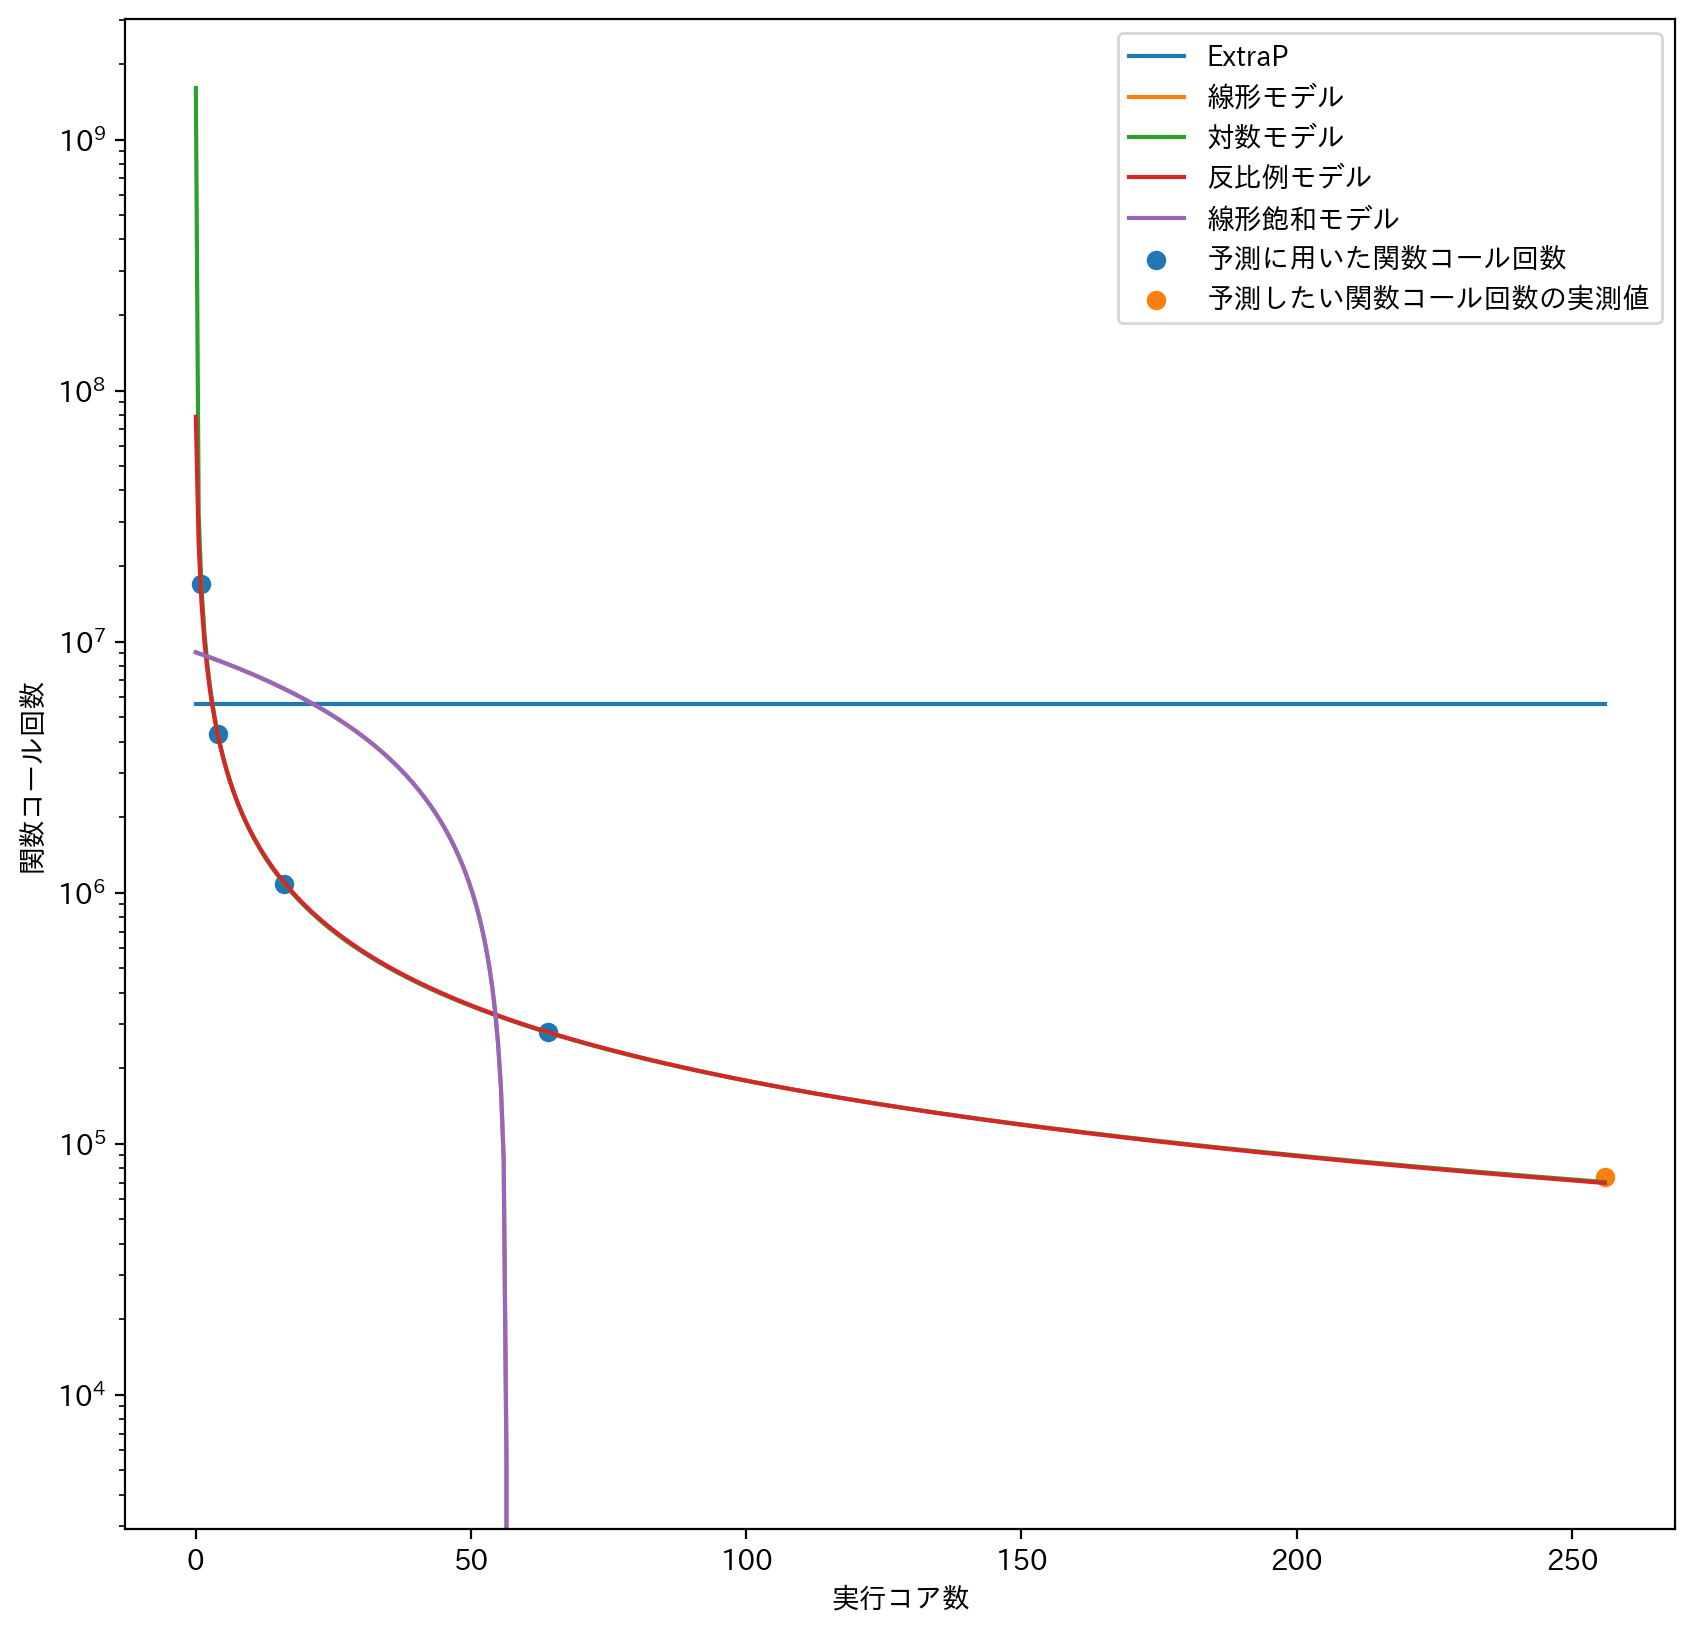

In [6]:
plt.figure(figsize=(10,10),dpi=200)

# ベンチマーク名と関数名の指定
benchmarkName = "bt"
functionName = "EXACT_SOLUTION"
print(f"___________________\"{benchmarkName}\"_____\"{functionName}\"___________________")

# Extra-PでfixProcessデータを入力して出力したモデルの図示
plot_x = np.linspace(0.01, 256, 500)
# 下記はExtra-Pで出力されたモデル
# 5654491.5
plot_y = []
plot_y = [5654491.5 for x in plot_x]
plt.plot(plot_x, plot_y, label="ExtraP")

# 実データの取り出し
functionDF = funcCallNumDict[benchmarkName][functionName]
functionDF
raw_x = functionDF.columns.tolist()
raw_y = [functionDF.at[functionName, x] for x in raw_x]
raw_x = np.array(raw_x).reshape(-1,1)
raw_y = np.array(raw_y).reshape(-1, 1)

# 説明変数と目的変数に分割
train_x, target_x = raw_x[:-1], raw_x[-1]
train_y, target_y = raw_y[:-1], raw_y[-1]

plt.scatter(train_x, train_y, marker="o", label="予測に用いた関数コール回数")
plt.scatter(target_x, target_y, marker="o", label="予測したい関数コール回数の実測値")

# モデル式をプロットするために変数”plot_x”に対して変換を実施
plot_x = np.array(plot_x).reshape(-1, 1)

# 線形モデル
model_lin = ModelLin(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_lin.calc_lr()
plot_y_lin = model_lin.predict(plot_x)
plt.plot(plot_x, plot_y_lin, label="線形モデル")
# 対数モデル
model_log10 = ModelLog10(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_log10.calc_lr()
plot_y_log10 = model_log10.predict(plot_x)
plt.plot(plot_x, plot_y_log10, label="対数モデル")
# 反比例モデル
model_ip = ModelIP(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_ip.calc_lr()
plot_y_ip = model_ip.predict(plot_x)
plt.plot(plot_x, plot_y_ip, label="反比例モデル")
# 線形飽和モデル
model_branch = ModelBranch(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_branch.calc_lr()
plot_y_branch = model_branch.predict(plot_x)
plt.plot(plot_x, plot_y_branch, label="線形飽和モデル")
# 凡例の表示
plt.legend()
# 軸ラベルの設定
plt.ylabel("関数コール回数")
plt.xlabel("実行コア数")
# 軸の対数軸化
# plt.xscale('log')
plt.yscale('log')

___________________"cg"_____"MPI_Irecv()"___________________


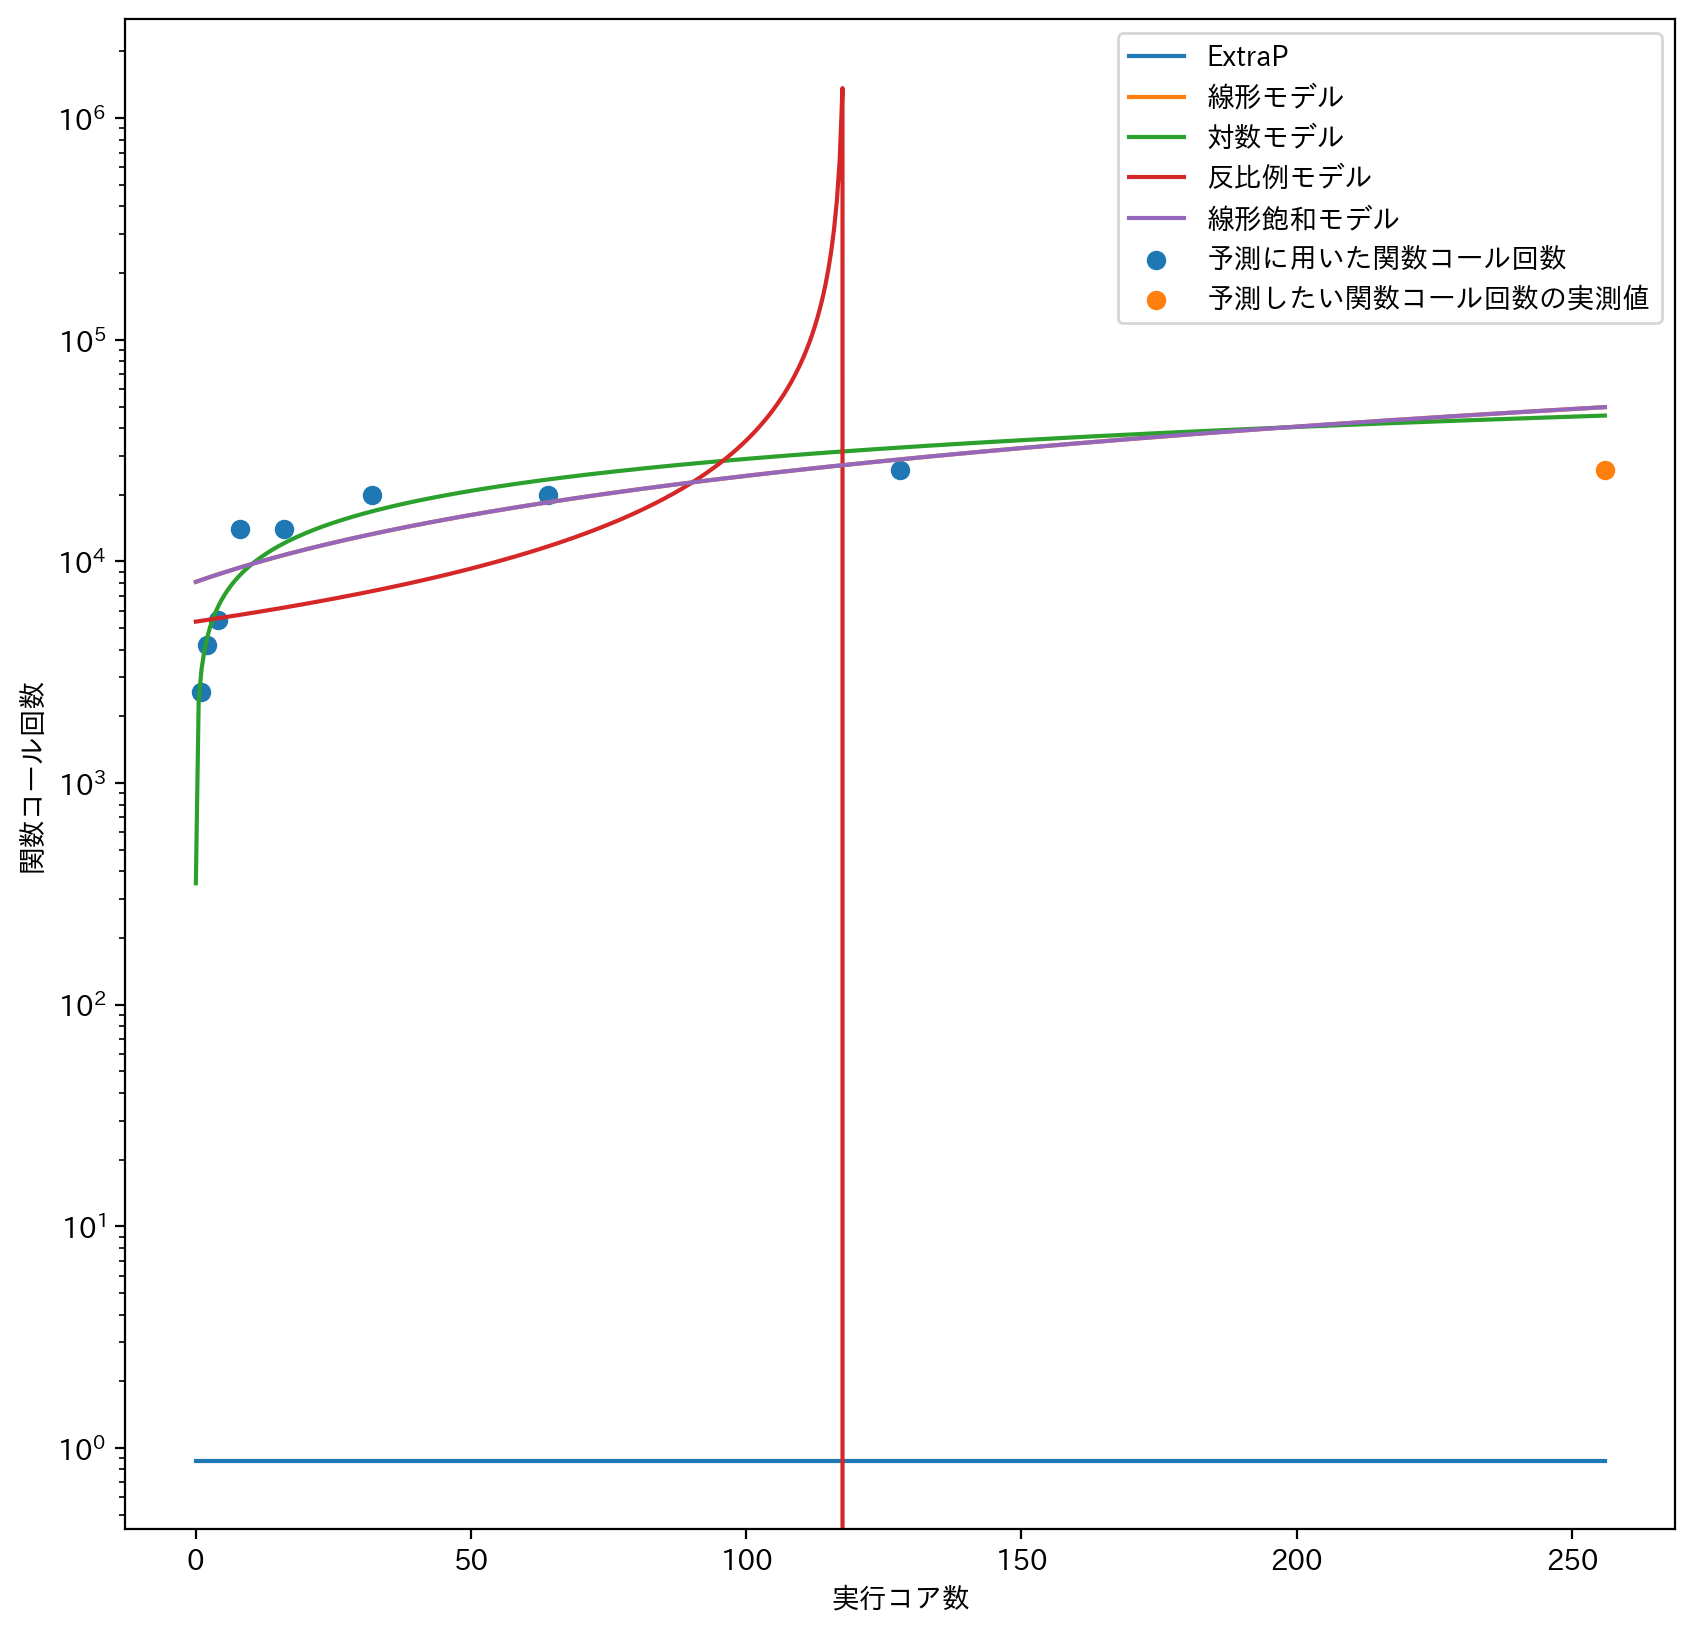

In [8]:
plt.figure(figsize=(10,10),dpi=200)

# ベンチマーク名と関数名の指定
benchmarkName = "cg"
functionName = "MPI_Irecv()"
print(f"___________________\"{benchmarkName}\"_____\"{functionName}\"___________________")

# Extra-PでfixProcessデータを入力して出力したモデルの図示
plot_x = np.linspace(0.01, 256, 500)
# 下記はExtra-Pで出力されたモデル
# 0.8754883749999999
plot_y = []
plot_y = [0.8754883749999999 for x in plot_x]
plt.plot(plot_x, plot_y, label="ExtraP")

# 実データの取り出し
functionDF = funcCallNumDict[benchmarkName][functionName]
functionDF
raw_x = functionDF.columns.tolist()
raw_y = [functionDF.at[functionName, x] for x in raw_x]
raw_x = np.array(raw_x).reshape(-1,1)
raw_y = np.array(raw_y).reshape(-1, 1)

# 説明変数と目的変数に分割
train_x, target_x = raw_x[:-1], raw_x[-1]
train_y, target_y = raw_y[:-1], raw_y[-1]

plt.scatter(train_x, train_y, marker="o", label="予測に用いた関数コール回数")
plt.scatter(target_x, target_y, marker="o", label="予測したい関数コール回数の実測値")

# モデル式をプロットするために変数”plot_x”に対して変換を実施
plot_x = np.array(plot_x).reshape(-1, 1)

# 線形モデル
model_lin = ModelLin(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_lin.calc_lr()
plot_y_lin = model_lin.predict(plot_x)
plt.plot(plot_x, plot_y_lin, label="線形モデル")
# 対数モデル
model_log10 = ModelLog10(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_log10.calc_lr()
plot_y_log10 = model_log10.predict(plot_x)
plt.plot(plot_x, plot_y_log10, label="対数モデル")
# 反比例モデル
model_ip = ModelIP(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_ip.calc_lr()
plot_y_ip = model_ip.predict(plot_x)
plt.plot(plot_x, plot_y_ip, label="反比例モデル")
# 線形飽和モデル
model_branch = ModelBranch(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_branch.calc_lr()
plot_y_branch = model_branch.predict(plot_x)
plt.plot(plot_x, plot_y_branch, label="線形飽和モデル")
# 凡例の表示
plt.legend()
# 軸ラベルの設定
plt.ylabel("関数コール回数")
plt.xlabel("実行コア数")
# 軸の対数軸化
# plt.xscale('log')
plt.yscale('log')